Creates dataframe of individual fight data using the information in the json files

In [185]:
import pandas as pd 
import json 
import os 
import numpy as np

folder_path = 'events'  
fight_rows = []

# Loop through all JSON files
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        with open(os.path.join(folder_path, filename), 'r') as f:
            data = json.load(f)

        date = data.get("date")
        event = data.get("event")

        for key, fight in data.items():
            if isinstance(fight, dict) and 'fighter1' in fight and 'fighter2' in fight:
                f1_data = fight.get('fighter1_fight_data') or {}
                f2_data = fight.get('fighter2_fight_data') or {}

                row = {
                    'event': event,
                    'date': date,
                    'fight_name': fight.get('name'),
                    'f1': fight.get('fighter1'),
                    'f2': fight.get('fighter2'),
                    'winner': fight.get('winner'),
                    'method': fight.get('method'),
                    'fight_length': fight.get('fight_length')
                }

                # Add all fighter1 stats with prefix f1_
                for stat, value in f1_data.items():
                    row[f'f1_{stat}'] = value

                # Add all fighter2 stats with prefix f2_
                for stat, value in f2_data.items():
                    row[f'f2_{stat}'] = value

                fight_rows.append(row)

# Create DataFrame
fight_df = pd.DataFrame(fight_rows)
fight_df['date'] = pd.to_datetime(fight_df['date'], errors='coerce')

fight_df.sort_values(by='date', inplace=True)
fight_df.to_csv('fight_df.csv')

Create a new dataframe of features to analyze

In [186]:

feature_df = pd.DataFrame()


feature_df['f1'] = fight_df['f1']
feature_df['f2'] = fight_df['f2']
feature_df['winner'] = fight_df['winner']



Win, loss, winrate, and aggregate stats

In [ ]:
# Holds stats
win_counter = {}
f1_win_list = []
f2_win_list = []

loss_counter = {}
f1_loss_list = []
f2_loss_list = []

f1_fight_list = []
f2_fight_list = []

fight_counter = {}
f1_winrate_list = []
f2_winrate_list = []

kd_counter = {}
f1_avg_kd_list = []
f2_avg_kd_list = []

sig_str_landed_counter = {} 
f1_avg_sig_str_landed_list = []
f2_avg_sig_str_landed_list = []

str_landed_counter = {}
f1_avg_str_landed_list = []
f2_avg_str_landed_list = []

td_comp_counter = {}
f1_avg_td_comp_list = []
f2_avg_td_comp_list = []

ctrl_time_counter = {}
f1_avg_ctrl_time_list = []
f2_avg_ctrl_time_list = []







for _, row in fight_df.iterrows():
    ## Get stats ##
    f1 = row['f1']
    f2 = row['f2']
    winner = row['winner']
    # Get fighters total fights
    f1_fights = fight_counter.get(f1, 0)
    f2_fights = fight_counter.get(f2, 0)
    # Get fighters wins and losses
    f1_wins = win_counter.get(f1, 0)
    f1_losses = loss_counter.get(f1, 0) 
    f2_wins = win_counter.get(f2, 0) 
    f2_losses = loss_counter.get(f2, 0) 
    # Get fighters knockdowns
    f1_kd = kd_counter.get(f1, 0)
    f2_kd = kd_counter.get(f2, 0)
    # Get fighters significant strikes landed
    f1_sig_str_landed = sig_str_landed_counter.get(f1, 0)
    f2_sig_str_landed = sig_str_landed_counter.get(f2, 0)
    # Get fighters total strikes landed
    f1_str_landed = str_landed_counter.get(f1, 0) 
    f2_str_landed = str_landed_counter.get(f2, 0) 
    # Get fighters completed takedowns 
    f1_td_comp = td_comp_counter.get(f1, 0) 
    f2_td_comp = td_comp_counter.get(f2, 0) 
    # Get fighters control time 
    f1_ctrl_time = ctrl_time_counter.get(f1, 0) 
    f2_ctrl_time = ctrl_time_counter.get(f2, 0)

    
    ## Add stats ## 
    # Add wins, lasses, and total fights
    f1_win_list.append(f1_wins)
    f1_loss_list.append(f1_losses)
    f2_win_list.append(f2_wins)
    f2_loss_list.append(f2_losses)
    f1_fight_list.append(f1_fights)
    f2_fight_list.append(f2_fights)
    # Add winrate
    if f1_fights != 0:
        f1_winrate_list.append(f1_wins / f1_fights)
    else: 
        f1_winrate_list.append(0.0)
        
    if f2_fights != 0:    
        f2_winrate_list.append(f2_wins / f2_fights)
    else: 
        f2_winrate_list.append(0.0)
    # Add average knockdowns
    if f1_fights != 0:
        f1_avg_kd_list.append(f1_kd / f1_fights)
    else: 
        f1_avg_kd_list.append(0)
    if f2_fights != 0:    
        f2_avg_kd_list.append(f2_kd / f2_fights)
    else: 
        f2_avg_kd_list.append(0)
    # Add average significant strikes landed
    if f1_fights != 0:
        f1_avg_sig_str_landed_list.append(f1_sig_str_landed / f1_fights)
    else: 
        f1_avg_sig_str_landed_list.append(0)
    if f2_fights != 0:    
        f2_avg_sig_str_landed_list.append(f2_sig_str_landed / f2_fights)
    else: 
        f2_avg_sig_str_landed_list.append(0)
    # Add average strikes landed
    if f1_fights != 0:
        f1_avg_str_landed_list.append(f1_str_landed / f1_fights)
    else: 
        f1_avg_str_landed_list.append(0)
    if f2_fights != 0:    
        f2_avg_str_landed_list.append(f2_str_landed / f2_fights)
    else: 
        f2_avg_str_landed_list.append(0)
    # Add average completed takedowns 
    if f1_fights != 0:
        f1_avg_td_comp_list.append(f1_td_comp / f1_fights)
    else: 
        f1_avg_td_comp_list.append(0)
    if f2_fights != 0:    
        f2_avg_td_comp_list.append(f2_td_comp / f2_fights)
    else: 
        f2_avg_td_comp_list.append(0)
    # Add average control time 
    if f1_fights != 0:
        f1_avg_ctrl_time_list.append(f1_ctrl_time / f1_fights)
    else: 
        f1_avg_ctrl_time_list.append(0)
    if f2_fights != 0:    
        f2_avg_ctrl_time_list.append(f2_ctrl_time / f2_fights)
    else: 
        f2_avg_ctrl_time_list.append(0)


    
    ## Update stats ## 
    # Updates wins, losses, and total fights
    if winner == f1:
        win_counter[f1] = win_counter.get(f1, 0) + 1
        loss_counter[f2] = loss_counter.get(f2, 0) + 1 
    
    elif winner == f2: 
        win_counter[f2] = win_counter.get(f2, 0) + 1
        loss_counter[f1] = loss_counter.get(f1, 0) + 1 
    
    fight_counter[f1] = fight_counter.get(f1, 0) + 1 
    fight_counter[f2] = fight_counter.get(f2, 0) + 1 
    # Updates kds
    kd_counter[f1] = kd_counter.get(f1, 0) + row['f1_kd']
    kd_counter[f2] = kd_counter.get(f2, 0) + row['f2_kd']
    # Updates significant strikes landed
    sig_str_landed_counter[f1] = sig_str_landed_counter.get(f1, 0) + row['f1_sig_str_landed']
    sig_str_landed_counter[f2] = sig_str_landed_counter.get(f2, 0) + row['f2_sig_str_landed']
    # Updates strikes landed
    str_landed_counter[f1] = str_landed_counter.get(f1, 0) + row['f1_str_landed']
    str_landed_counter[f2] = str_landed_counter.get(f2, 0) + row['f2_str_landed']
    # Updates takedowns completed
    td_comp_counter[f1] = td_comp_counter.get(f1, 0) + row['f1_td_comp']
    td_comp_counter[f2] = td_comp_counter.get(f2, 0) + row['f2_td_comp']
    # Updates takedowns completed
    ctrl_time_counter[f1] = ctrl_time_counter.get(f1, 0) + row['f1_ctrl_time']
    ctrl_time_counter[f2] = ctrl_time_counter.get(f2, 0) + row['f2_ctrl_time']


    
## Add to data frame ## 
# fighter 1 
feature_df['f1_winrate'] = f1_winrate_list
# feature_df['f1_wins'] = f1_win_list
# feature_df['f1_losses'] = f1_loss_list
feature_df['f1_fights'] = f1_fight_list
# feature_df['f1_avg_kd'] = f1_avg_kd_list
feature_df['f1_avg_sig_str_landed'] = f1_avg_sig_str_landed_list
feature_df['f1_avg_str_landed'] = f1_avg_str_landed_list
feature_df['f1_avg_td_comp'] = f1_avg_td_comp_list
feature_df['f1_avg_ctrl_time'] = f1_avg_ctrl_time_list


# fighter 2 
feature_df['f2_winrate'] = f2_winrate_list
# feature_df['f2_wins'] = f2_win_list
# feature_df['f2_losses'] = f2_loss_list
feature_df['f2_fights'] = f2_fight_list
# feature_df['f2_avg_kd'] = f2_avg_kd_list
feature_df['f2_avg_sig_str_landed'] = f2_avg_sig_str_landed_list
feature_df['f2_avg_str_landed'] = f2_avg_str_landed_list
feature_df['f2_avg_td_comp'] = f2_avg_td_comp_list
feature_df['f2_avg_ctrl_time'] = f2_avg_ctrl_time_list


feature_df.to_csv('feature_df.cvs')



Get the fights where both fighters have fought atleast 3 times 

In [188]:
feature_df = feature_df[(feature_df['f1_fights'] >= 3) & (feature_df['f2_fights'] >= 3)]  


In [189]:
# Encode 1 if f1 wins, 0 if f2 wins  
feature_df['label'] = (feature_df['winner'] == feature_df['f1']).astype(int)
feature_df = feature_df.drop(columns=['f1', 'f2', 'winner', 'f1_fights', 'f2_fights'])
feature_df.dropna()


,f1_winrate,f1_avg_sig_str_landed,f1_avg_str_landed,f1_avg_ctrl_time,f2_winrate,f2_avg_sig_str_landed,f2_avg_str_landed,f2_avg_ctrl_time,label
3215,0.750000,1.000000,12.000000,0.000000,0.666667,7.333333,13.000000,0.000000,1
314,0.714286,2.714286,12.857143,0.000000,0.600000,5.000000,19.800000,0.000000,1
313,1.000000,12.666667,22.333333,0.000000,0.666667,15.333333,17.666667,0.000000,1
312,0.800000,0.800000,10.600000,0.000000,0.500000,6.750000,11.000000,0.000000,1
311,0.750000,2.375000,11.250000,0.000000,0.750000,9.750000,16.750000,0.000000,1
...,...,...,...,...,...,...,...,...,...
4094,0.666667,44.833333,81.916667,262.416667,0.727273,36.909091,71.272727,239.909091,1
4095,0.500000,24.500000,34.750000,90.000000,0.375000,30.875000,46.250000,91.000000,1
4096,0.666667,17.000000,40.000000,102.000000,0.666667,16.666667,39.666667,242.000000,0
4097,0.250000,57.000000,111.000000,121.750000,0.571429,19.428571,54.428571,143.714286,0


Split the data

In [190]:
from sklearn.model_selection import train_test_split

X = feature_df.drop(columns='label')
y = feature_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6276747503566333
              precision    recall  f1-score   support

           0       0.46      0.26      0.33       251
           1       0.67      0.83      0.74       450

    accuracy                           0.63       701
   macro avg       0.57      0.55      0.54       701
weighted avg       0.60      0.63      0.60       701



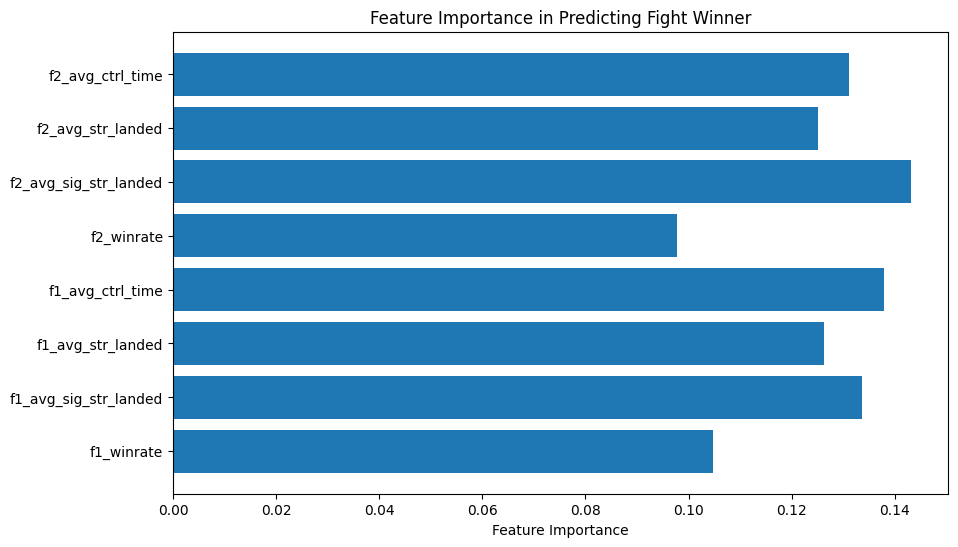

In [192]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting Fight Winner")
plt.show()